In [1]:
import pandas as pd
fp = "../../data/incident_event_log_02.csv"
df = pd.read_csv(fp)

/var/folders/fb/t_m5qpcj6qq85rvkh73vbxh40000gn/T/ipykernel_6039/1966600636.py:3: DtypeWarning: Columns (19,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fp)


In [2]:
SELECT_COLS = ['number', 'sys_created_at', 'closed_at', 'assignment_group']
closed_tickets = df.incident_state == "Closed"
df_closed_tickets = df[closed_tickets][SELECT_COLS].copy()
del df
df_closed_tickets = df_closed_tickets.reset_index(drop=True)

GridSpec(6, 6)

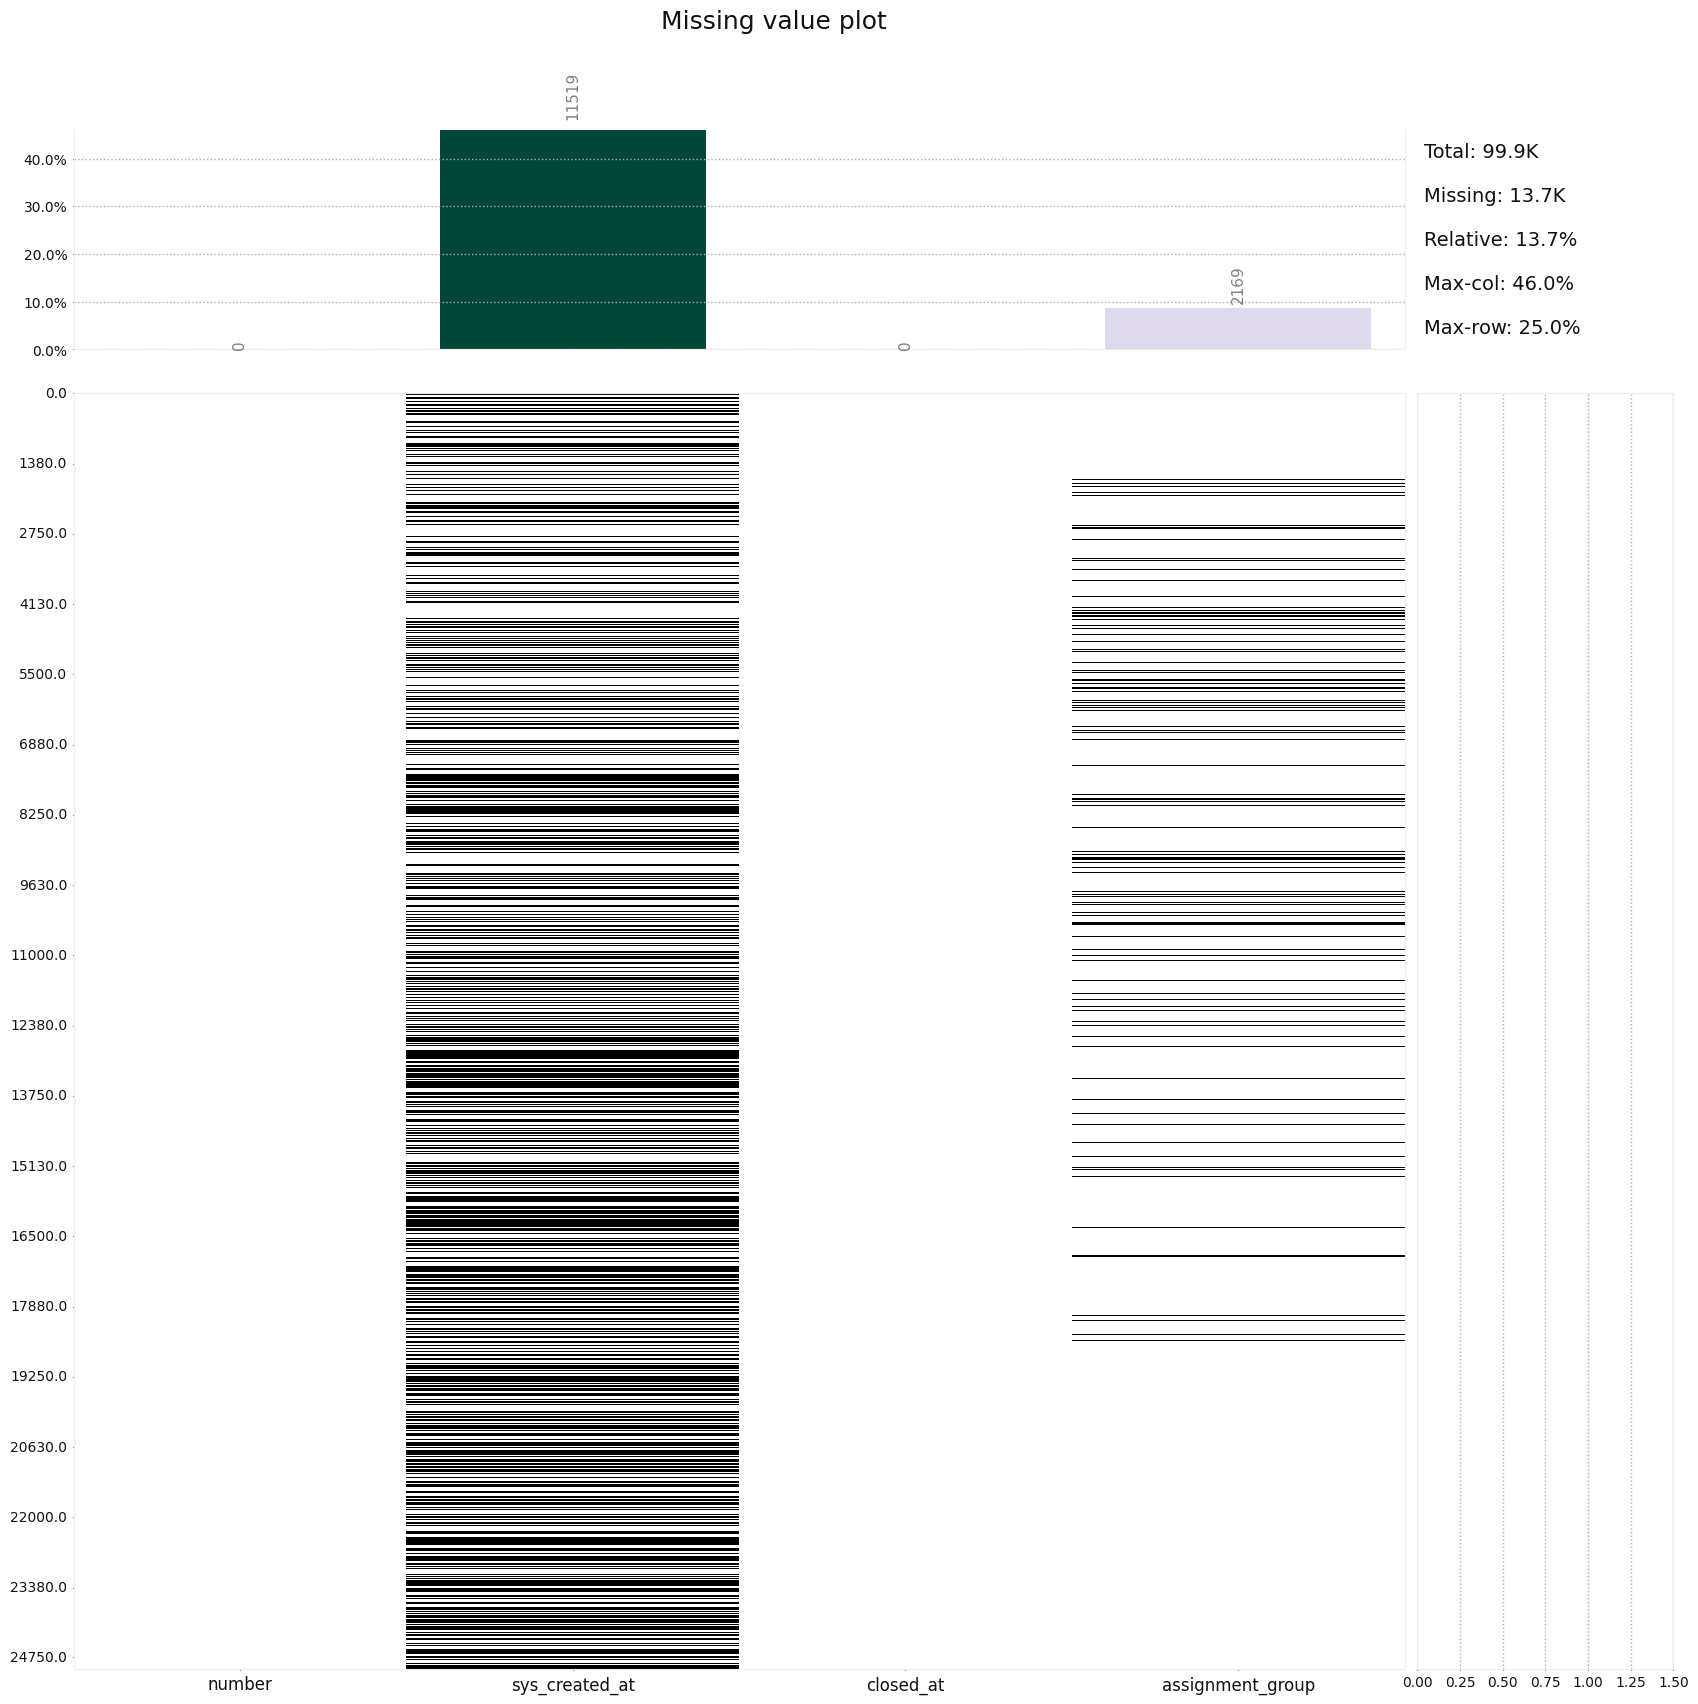

In [3]:
import klib
klib.missingval_plot(df_closed_tickets)

In [4]:
def noise_filter_1(row):
    creation_date = row['sys_created_at']
    valid_creation_date = True
    valid_closed_date = True
    cd = cls_dt = None
    if pd.isna(creation_date):
        valid_creation_date = False
    else:
        try:
            #creation_date = pd.to_datetime(creation_date, infer_datetime_format=True)
            creation_date = pd.to_datetime(creation_date, format='ISO8601', dayfirst=True)
        except:
            valid_creation_date = False
    
            
    closed_date = row["closed_at"]
    
    if pd.isna(closed_date):
        valid_closed_date = False
    else:
        try:
            cls_dt = pd.to_datetime(closed_date, format='ISO8601', dayfirst=True)

        except:
            valid_closed_date = False
    
    
    clean_row = valid_creation_date & valid_closed_date
    

    return valid_creation_date

In [5]:
df_closed_tickets = df_closed_tickets[df_closed_tickets.apply(noise_filter_1, axis=1)]

In [6]:
klib.missingval_plot(df_closed_tickets)

No missing values found in the dataset.
